<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/IPOs_vs_Retornos_Vers%C3%A3o_Preliminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de data de IPO vs. retorno

## Instalação e importação de bibliotecas

In [ ]:
!pip install tradingcomdados
from tradingcomdados import alternative_data as ad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.0
    Uninstalling joblib-1.4.0:
      Successfully uninstalled joblib-1.4.0


In [ ]:
import yfinance as yf
import seaborn as sns
import pandas as pd

## Obtendo papéis do IBOV

In [ ]:
ibov = ad.index_composition('ibov')

In [ ]:
ibov = list(ibov.cod)

In [ ]:
ibov = yf.download([i+ '.SA' for i in ibov], start = '2012-01-01')['Adj Close']

[*********************100%%**********************]  86 of 86 completed


## Obtendo o primeiro índice válido

In [ ]:
ibov['ASAI3.SA'].first_valid_index()

Timestamp('2021-03-01 00:00:00')

In [ ]:
first_valid_index = ibov.apply(lambda x: x.first_valid_index(), axis=0)

In [ ]:
first_valid_index

Ticker
ABEV3.SA   2012-01-02
ALOS3.SA   2023-10-18
ALPA4.SA   2012-01-02
ARZZ3.SA   2012-01-02
ASAI3.SA   2021-03-01
              ...    
VAMO3.SA   2021-02-02
VBBR3.SA   2018-03-14
VIVT3.SA   2012-01-02
WEGE3.SA   2012-01-02
YDUQ3.SA   2012-01-02
Length: 86, dtype: datetime64[ns]

In [ ]:
first_valid_index[first_valid_index!='2012-01-02']

Ticker
ALOS3.SA    2023-10-18
ASAI3.SA    2021-03-01
AZUL4.SA    2017-04-11
BBSE3.SA    2013-04-29
BPAC11.SA   2017-02-24
CMIN3.SA    2021-02-22
COGN3.SA    2012-03-14
CRFB3.SA    2017-07-20
CVCB3.SA    2013-12-09
HAPV3.SA    2018-04-26
IGTI11.SA   2021-11-22
IRBR3.SA    2017-07-31
KLBN11.SA   2014-01-23
LWSA3.SA    2020-02-06
NTCO3.SA    2019-12-18
PETZ3.SA    2020-09-15
RAIL3.SA    2015-04-02
RAIZ4.SA    2021-08-05
RDOR3.SA    2020-12-15
RECV3.SA    2021-05-05
RRRP3.SA    2020-11-12
SOMA3.SA    2020-07-31
VAMO3.SA    2021-02-02
VBBR3.SA    2018-03-14
dtype: datetime64[ns]

In [ ]:
list(first_valid_index[first_valid_index!='2012-01-02'].index)

['ALOS3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'BBSE3.SA',
 'BPAC11.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CRFB3.SA',
 'CVCB3.SA',
 'HAPV3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'KLBN11.SA',
 'LWSA3.SA',
 'NTCO3.SA',
 'PETZ3.SA',
 'RAIL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RECV3.SA',
 'RRRP3.SA',
 'SOMA3.SA',
 'VAMO3.SA',
 'VBBR3.SA']

In [ ]:
ibov[list(first_valid_index[first_valid_index!='2012-01-02'].index)[1]]

Date
2012-01-02      NaN
2012-01-03      NaN
2012-01-04      NaN
2012-01-05      NaN
2012-01-06      NaN
              ...  
2024-04-16    13.00
2024-04-17    12.84
2024-04-18    13.18
2024-04-19    13.38
2024-04-22    13.46
Name: ASAI3.SA, Length: 3054, dtype: float64

In [ ]:
ibov[list(first_valid_index[first_valid_index!='2012-01-02'].index)[1]].dropna()

Date
2021-03-01    13.990468
2021-03-02    14.206008
2021-03-03    13.970875
2021-03-04    14.343170
2021-03-05    14.695869
                ...    
2024-04-16    13.000000
2024-04-17    12.840000
2024-04-18    13.180000
2024-04-19    13.380000
2024-04-22    13.460000
Name: ASAI3.SA, Length: 785, dtype: float64

## Criando um loop

In [ ]:
dicionario = dict()

In [ ]:
i = 'AZUL4.SA'

In [ ]:
df = ibov[i].dropna()

In [ ]:
df_norm = df/df.iloc[0]

In [ ]:
df_norm

Date
2017-04-11    1.000000
2017-04-12    1.025000
2017-04-13    1.026339
2017-04-17    1.020089
2017-04-18    1.067411
                ...   
2024-04-16    0.467411
2024-04-17    0.467411
2024-04-18    0.449554
2024-04-19    0.443750
2024-04-22    0.458482
Name: AZUL4.SA, Length: 1750, dtype: float64

In [ ]:
ibov = ibov.dropna(axis=1, how='all')

In [ ]:
ipo = dict()
dicionario = dict()

In [ ]:
for i in ibov.columns:
    local = ibov[i].dropna()
    df_normal = local/local.iloc[0]
    total_return = 100*(df_normal.iloc[-1] - 1)
    dicionario[i] = total_return
    ipo[i] = ibov[i].first_valid_index()

In [ ]:
acoes = pd.DataFrame({'retornos': dicionario, 'ipos':ipo})

In [ ]:
pd.DataFrame.from_dict(ipo, orient = 'index')

,0
ABEV3.SA,2012-01-02
ALOS3.SA,2023-10-18
ALPA4.SA,2012-01-02
ARZZ3.SA,2012-01-02
ASAI3.SA,2021-03-01
...,...
VAMO3.SA,2021-02-02
VBBR3.SA,2018-03-14
VIVT3.SA,2012-01-02
WEGE3.SA,2012-01-02


In [ ]:
acoes_filt = acoes[acoes['ipos'] > '2018-01-02']

In [ ]:
acoes_filt

,retornos,ipos
ALOS3.SA,-0.909499,2023-10-18
ASAI3.SA,-3.720160,2021-03-01
CMIN3.SA,-15.005984,2021-02-22
HAPV3.SA,-32.852528,2018-04-26
IGTI11.SA,9.393441,2021-11-22
LWSA3.SA,-2.452838,2020-02-06
NTCO3.SA,-51.992907,2019-12-18
PETZ3.SA,-65.599849,2020-09-15
RAIZ4.SA,-51.834299,2021-08-05
RDOR3.SA,-60.488414,2020-12-15


<Axes: xlabel='ipos', ylabel='retornos'>

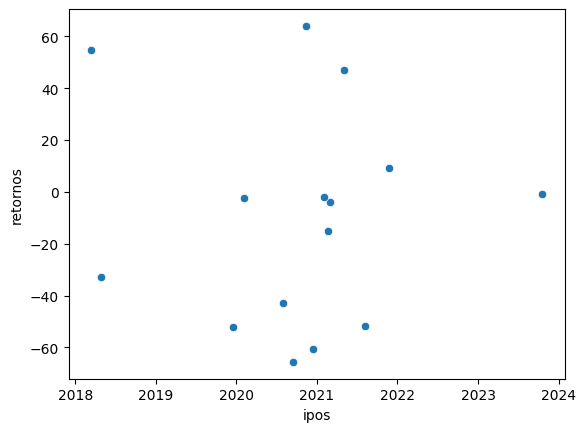

In [ ]:
sns.scatterplot(data=acoes_filt, x="ipos", y="retornos")

## Plot normalizado

In [ ]:
acoes_filt[acoes_filt['retornos'] < 0]

,retornos,ipos
ALOS3.SA,-0.909499,2023-10-18
ASAI3.SA,-3.720160,2021-03-01
CMIN3.SA,-15.005984,2021-02-22
HAPV3.SA,-32.852528,2018-04-26
LWSA3.SA,-2.452838,2020-02-06
NTCO3.SA,-51.992907,2019-12-18
PETZ3.SA,-65.599849,2020-09-15
RAIZ4.SA,-51.834299,2021-08-05
RDOR3.SA,-60.488414,2020-12-15
SOMA3.SA,-42.949353,2020-07-31


In [ ]:
len(acoes_filt[acoes_filt['retornos'] < 0]) / len(acoes_filt)

0.7333333333333333

[*********************100%%**********************]  11 of 11 completed


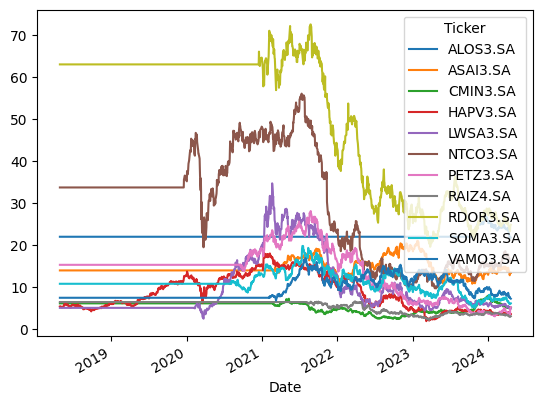

In [ ]:
losers = yf.download(list(acoes_filt[acoes_filt['retornos'] < 0].index), start = '2018-01-01')['Adj Close']
losers = losers.bfill()
losers = losers.ffill()
losers.plot();

In [ ]:
losers_norm = losers/losers.iloc[0]*100

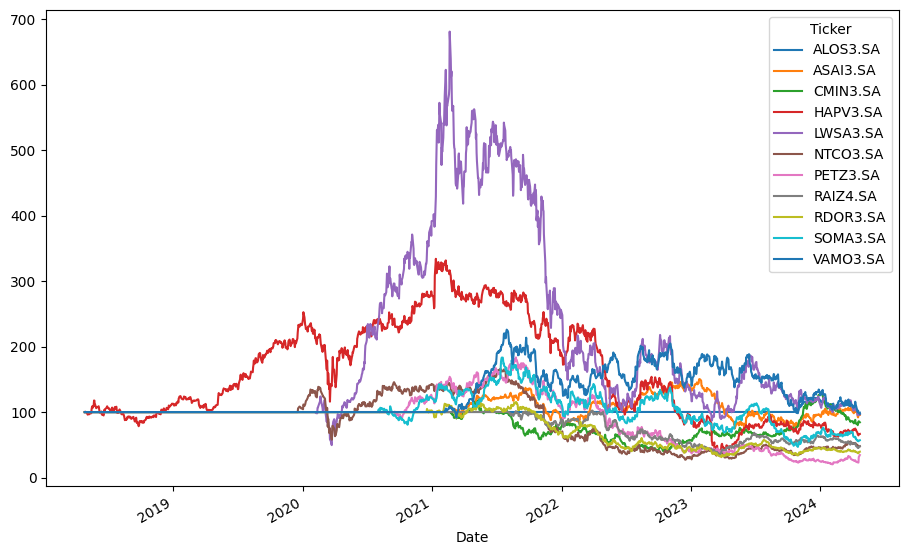

In [ ]:
losers_norm.plot(figsize = (11,7));